In [7]:
tr_rates <- read.csv("./Rates.csv",header = TRUE,row.names = 1 )
head(tr_rates)

,X1M,X2M,X3M,X6M,X1Y,X2Y,X3Y,X5Y,X7Y,X10Y,X20Y,X30Y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
01/03/22,0.05,0.06,0.08,0.22,0.40,0.78,1.04,1.37,1.55,1.63,2.05,2.01
01/04/22,0.06,0.05,0.08,0.22,0.38,0.77,1.02,1.37,1.57,1.66,2.10,2.07
01/05/22,0.05,0.06,0.09,0.22,0.41,0.83,1.10,1.43,1.62,1.71,2.12,2.09
01/06/22,0.04,0.05,0.10,0.23,0.45,0.88,1.15,1.47,1.66,1.73,2.12,2.09
01/07/22,0.05,0.05,0.10,0.24,0.43,0.87,1.17,1.50,1.69,1.76,2.15,2.11
01/10/22,0.05,0.06,0.13,0.28,0.46,0.92,1.21,1.53,1.71,1.78,2.15,2.11


In [4]:
maturities <- c(1/12,2/12,3/12,0.5,1,2,3,5,7,10,20,30)
round(maturities,3)

[1]  0.083  0.167  0.250  0.500  1.000  2.000  3.000  5.000  7.000 10.000
[11] 20.000 30.000

In [8]:
(ndays  <-  dim(tr_rates)[1])


[1] 557

In [9]:
(ncol  <-  dim(tr_rates)[2])

[1] 12

In [13]:
(last <- tr_rates[ndays,1:ncol])

,X1M,X2M,X3M,X6M,X1Y,X2Y,X3Y,X5Y,X7Y,X10Y,X20Y,X30Y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
03/25/24,5.51,5.48,5.46,5.36,5,4.54,4.39,4.23,4.25,4.25,4.51,4.42


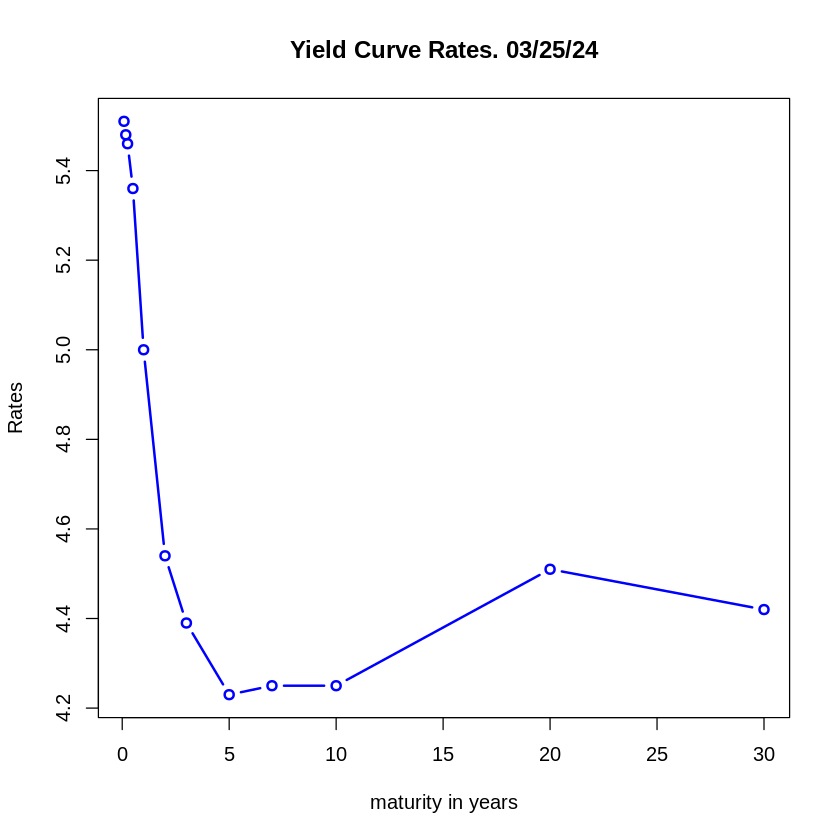

In [16]:
 lastdate <- rownames(tr_rates)[ndays]
 plot(maturities,last,type = 'b',pch = 21,main =paste("Yield Curve Rates.",lastdate),col = 'blue',lwd = 2,ylab= "Rates",xlab = "maturity in years")

In [18]:
tr_dates <- as.Date(rownames(tr_rates),"%m/%d/%y")
head(tr_dates)

[1] "2022-01-03" "2022-01-04" "2022-01-05" "2022-01-06" "2022-01-07"
[6] "2022-01-10"

In [96]:
install.packages(c("xts","FinAna"))
library(xts)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [21]:
  rates.xts <- as.xts(tr_rates, order.by = tr_dates)
  head(rates.xts)

            X1M  X2M  X3M  X6M  X1Y  X2Y  X3Y  X5Y  X7Y X10Y X20Y X30Y
2022-01-03 0.05 0.06 0.08 0.22 0.40 0.78 1.04 1.37 1.55 1.63 2.05 2.01
2022-01-04 0.06 0.05 0.08 0.22 0.38 0.77 1.02 1.37 1.57 1.66 2.10 2.07
2022-01-05 0.05 0.06 0.09 0.22 0.41 0.83 1.10 1.43 1.62 1.71 2.12 2.09
2022-01-06 0.04 0.05 0.10 0.23 0.45 0.88 1.15 1.47 1.66 1.73 2.12 2.09
2022-01-07 0.05 0.05 0.10 0.24 0.43 0.87 1.17 1.50 1.69 1.76 2.15 2.11
2022-01-10 0.05 0.06 0.13 0.28 0.46 0.92 1.21 1.53 1.71 1.78 2.15 2.11

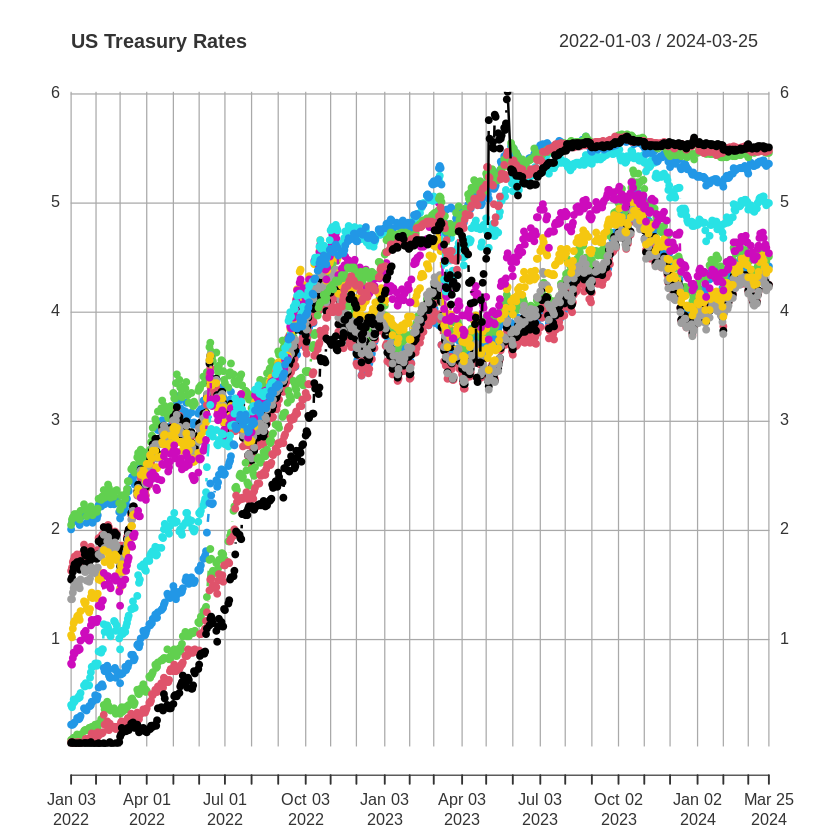

In [22]:
  plot(rates.xts,type = 'b',pch =20,main = "US Treasury Rates")

In [23]:
pca <- prcomp(rates.xts, scale = FALSE)
summary(pca)

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     4.5964 0.77876 0.37069 0.17263 0.09946 0.05740 0.04408
Proportion of Variance 0.9639 0.02767 0.00627 0.00136 0.00045 0.00015 0.00009
Cumulative Proportion  0.9639 0.99156 0.99783 0.99919 0.99964 0.99979 0.99988
                           PC8     PC9    PC10    PC11     PC12
Standard deviation     0.03844 0.02252 0.01873 0.01340 0.008143
Proportion of Variance 0.00007 0.00002 0.00002 0.00001 0.000000
Cumulative Proportion  0.99995 0.99997 0.99999 1.00000 1.000000

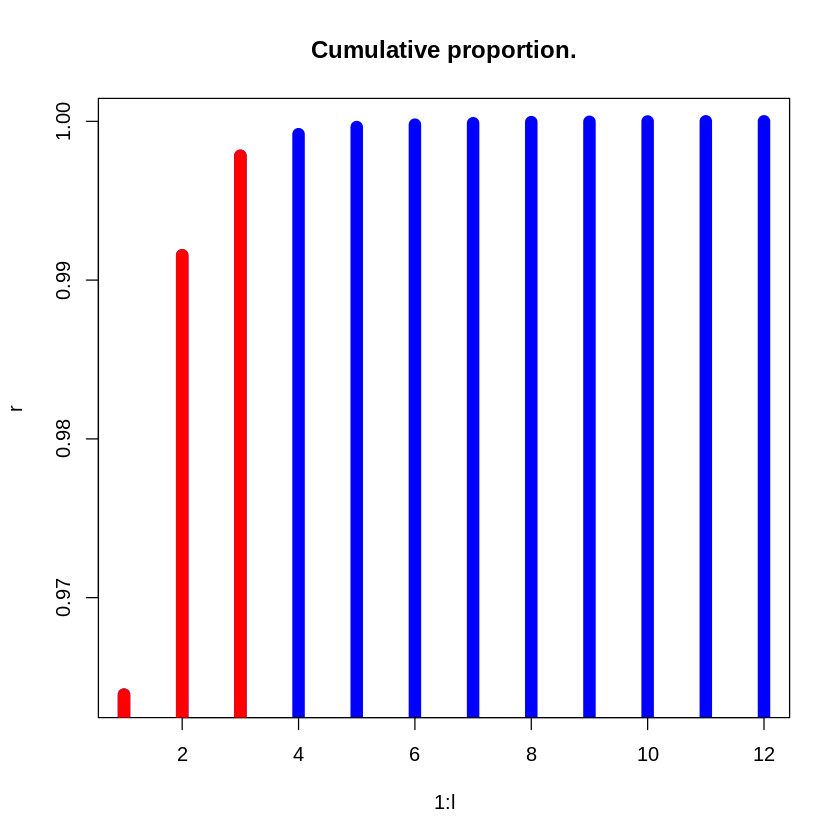

In [24]:
# посмотрим на накопленную меру информативности
 ss <- summary(pca)
 his <- ss$importance[3,]
 l <- length(his)
 his[4:l]<- NA
 r <- as.matrix(cbind(ss$importance[3,],his))

mp <- matplot(1:l,r,type = 'h',lty = 1, lwd = 10,main = "Cumulative proportion.", col = c("blue",'red')) # default
abline(h = 0.8,col = 'black')

In [34]:
(Cumulative <- ss$importance[3,])

PC1     PC2     PC3     PC4     PC5     PC6     PC7     PC8     PC9    PC10 
0.96389 0.99156 0.99783 0.99919 0.99964 0.99979 0.99988 0.99995 0.99997 0.99999 
   PC11    PC12 
1.00000 1.00000

In [35]:
tot <- ss$importance[2,]
rownames(ss$rotation)

[1] "X1M"  "X2M"  "X3M"  "X6M"  "X1Y"  "X2Y"  "X3Y"  "X5Y"  "X7Y"  "X10Y"
[11] "X20Y" "X30Y"

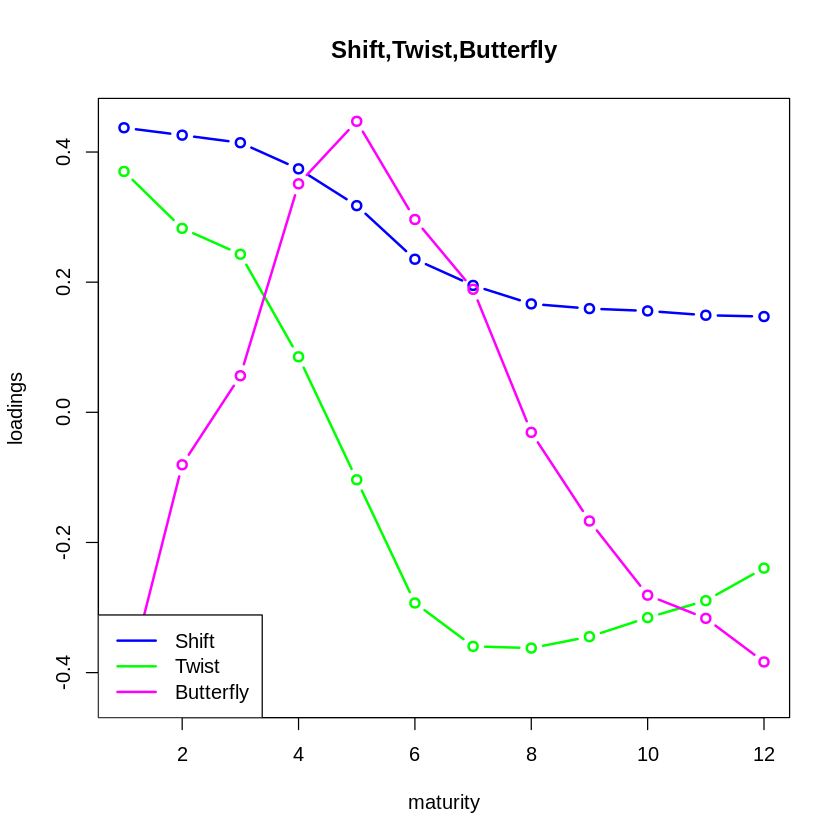

In [36]:
matplot(cbind(ss$rotation[,1],ss$rotation[,2],ss$rotation[,3]),type = 'b',pch=21,lwd = 2,
     col = c("blue","green","magenta"),main= "Shift,Twist,Butterfly",ylab = "loadings",xlab="maturity",lty=1 )
legend("bottomleft",c("Shift","Twist","Butterfly"),lty=c(1,1,1),lwd = 2,col = c("blue","green","magenta"))

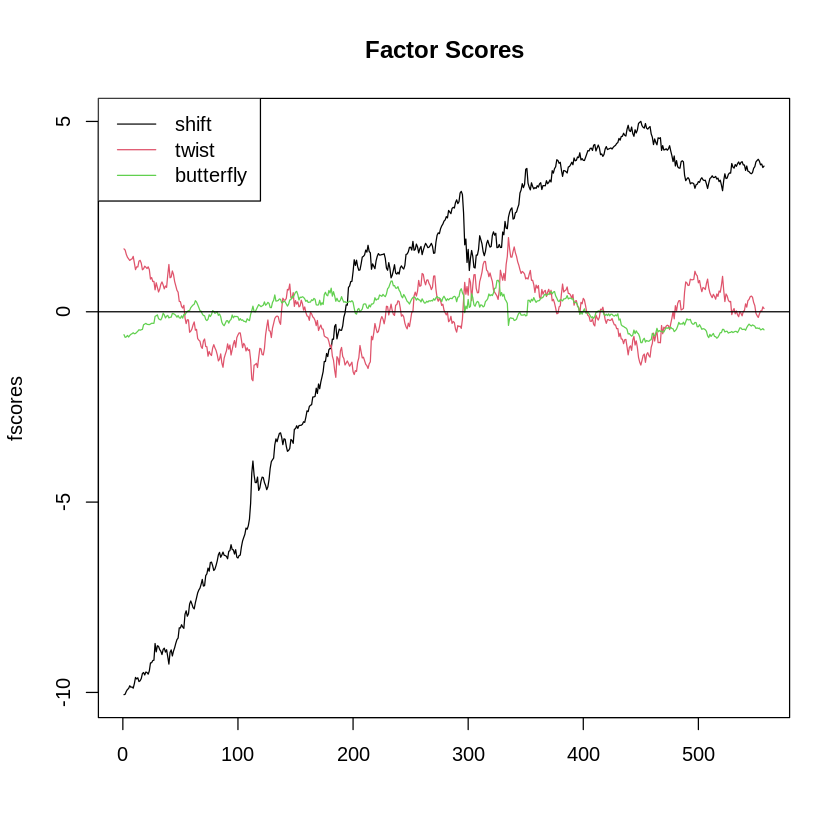

In [39]:
number <- 3
fscores <- scores(rates.xts,ss,number)
matplot(fscores,type = 'l',lty = 1, col = 1:number,main = 'Factor Scores')
legend('topleft',c('shift','twist','butterfly'),col = 1:number,lty = 1)
abline(h=0)

In [43]:
(Loadings <- pca$rotation[,1:3])

,PC1,PC2,PC3
X1M,0.4373316,0.37015499,-0.43389856
X2M,0.4259530,0.28274136,-0.08059994
X3M,0.4143037,0.24293722,0.05623156
X6M,0.3741846,0.08533676,0.35118811
X1Y,0.3176384,-0.10362164,0.44718035
X2Y,0.2352625,-0.29298686,0.29633042
X3Y,0.1950056,-0.35964216,0.18902760
X5Y,0.1666476,-0.36230162,-0.03079032
X7Y,0.1593870,-0.34478901,-0.16702623
X10Y,0.1558247,-0.31557246,-0.28098498


In [158]:
Fscores <- fscores

In [44]:
var <- 16

Вариант 0
t1=
 03/22/24

t2=
 03/25/24

Twist 20%

In [84]:
t1 <- "2024-03-22"
t2 <- "2024-03-25"

In [94]:
rest <- restoreData(fscores,pca$rotation[,1:3],pca$center)
head(rest)


,X1M,X2M,X3M,X6M,X1Y,X2Y,X3Y,X5Y,X7Y,X10Y,X20Y,X30Y
2022-01-03,0.10248986,0.005621728,0.06973899,0.2097344,0.4050673,0.8292564,1.067256,1.334823,1.509737,1.609037,2.060559,2.035532
2022-01-04,0.12599953,0.007133002,0.06283705,0.1868287,0.3808694,0.8207178,1.067883,1.350557,1.534339,1.640618,2.093712,2.071734
2022-01-05,0.11159115,0.006066068,0.06706798,0.2094850,0.4218513,0.8751336,1.125525,1.403701,1.583298,1.684617,2.133818,2.105214
2022-01-06,0.08925577,0.003058086,0.07162991,0.2349774,0.4622695,0.9198851,1.169191,1.437841,1.610615,1.705264,2.150836,2.115867
2022-01-07,0.10237043,0.005234146,0.06963568,0.2266159,0.4564932,0.9260549,1.181477,1.458424,1.635800,1.733752,2.179507,2.145111
2022-01-10,0.10035950,0.020562989,0.09141231,0.2642752,0.5020652,0.9676154,1.218601,1.484641,1.655182,1.746977,2.189681,2.150270


In [95]:
restored_data_rates <- rest[which(rownames(rest) == t1),]

In [97]:
library(FinAna)
portfolio <- c(150,150,150,15,200,15,20,20,10,10,100,100)


In [100]:
maturities

[1]  0.08333333  0.16666667  0.25000000  0.50000000  1.00000000  2.00000000
 [7]  3.00000000  5.00000000  7.00000000 10.00000000 20.00000000 30.00000000

In [98]:
par <- 1000
m <- 2
coupon <- 0.09

In [163]:
t1 <- "11/22/22"
t2 <- "11/22/22"

In [164]:
tr_rates[which(rownames(tr_rates) == t1),]

,X1M,X2M,X3M,X6M,X1Y,X2Y,X3Y,X5Y,X7Y,X10Y,X20Y,X30Y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11/22/22,3.97,4.26,4.4,4.68,4.79,4.47,4.27,3.93,3.86,3.76,4.05,3.83


In [165]:
price1 <- 0
for(i in 1:12)
    price1 <- price1 + portfolio[i] * bond.price(par,coupon,maturities[i],tr_rates[which(rownames(tr_rates) == t1),i],m)
price1

[1] 346183.9

In [166]:
price2 <- 0
for(i in 1:12)
    price2 <- price2 + portfolio[i] * bond.price(par,coupon,maturities[i],tr_rates[which(rownames(tr_rates) == t2),i],m)
(portfolio_change <-price2-price1)

[1] 0

What If?
var 16: butterfly -10%

In [167]:
price1 <- 0
for(i in 1:12)
    price1 <- price1 + portfolio[i] * bond.price(par,coupon,maturities[i],tr_rates[nrow(tr_rates),i],m)
price1

[1] 326799

In [168]:
tr_rates[nrow(tr_rates),]

,X1M,X2M,X3M,X6M,X1Y,X2Y,X3Y,X5Y,X7Y,X10Y,X20Y,X30Y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
03/25/24,5.51,5.48,5.46,5.36,5,4.54,4.39,4.23,4.25,4.25,4.51,4.42


In [169]:
(new <- fscores[557,,drop=FALSE])

new[,3] <- new[,3] * 0.9

new

,PC1,PC2,PC3
2024-03-25,3.82625,0.0852351,-0.475062


,PC1,PC2,PC3
2024-03-25,3.82625,0.0852351,-0.4275558


In [170]:
# twist * 1.2
rest <- restoreData(new, pca$rotation[,1:3],pca$center)
head(rest)

,X1M,X2M,X3M,X6M,X1Y,X2Y,X3Y,X5Y,X7Y,X10Y,X20Y,X30Y
2024-03-25,5.518773,5.462708,5.451392,5.332902,5.055984,4.606725,4.371435,4.21096,4.233782,4.217901,4.529998,4.387054


In [171]:
price2 <- 0
for(i in 1:12)
    price2 <- price2 + portfolio[i] * bond.price(par,coupon,maturities[i],rest[1,i],m)
(forecast_change <-price2-price1)

[1] -172.4876

In [172]:
result = list(
    var = var,
    Cumulative = Cumulative,
    Fscores = Fscores,
    Loadings = Loadings,
    restored_data_rates= restored_data_rates,
    portfolio_change = portfolio_change,
    forecast_change= forecast_change
)

In [173]:
 saveRDS(result,'result.rds')

In [38]:
scores <- function(ldata,pca,number)
{
  cdata <- ldata
  m <- dim(ldata)[2]
  for (i in 1:m)
    cdata[,i] <- ldata[,i] - pca$center[i]
  loads <- pca$rotation[,1:number]
  cdata <- as.matrix(cdata)
  f <- cdata %*% loads
  return (f)
}

In [45]:
restoreData<- function(fscores,loadings,center)
{
  npca <- dim(fscores)[2]
  myeigen <- t(loadings[,1:npca])
  rest <- fscores %*%myeigen
  m <- length(center)
  if (m == dim(rest)[2])
  {
    for (i in 1:m)
    rest[,i] <- rest[,i]+center[i]
  }
  return(rest)
}
